# The Monty Hall (or 3 doors) Problem

A classic problem that puzzles most who have studied probability is the Monty Hall problem, whose statement is deceptively simple:

   - You are on a game show. The host offers you the choice of three doors.

   - Behind one door is a brand-new car; behind the other two are goats.

   - You pick one door.

   - The host, who knows what's behind each door, opens another door, revealing a goat.

   - The host then asks: “Do you want to switch?”

Assuming you want to win the car, what should you do?

<figure>
  <img src="https://github.com/PessoaP/blog/blob/master/3doors/MHproblem.png?raw=true" alt="MH" style="width:75%; max-width:600px;"/>
</figure>


This problem is named after [Monty Hall](https://en.wikipedia.org/wiki/Monty_Hall), the original host of the TV show [*Let’s Make a Deal*](https://en.wikipedia.org/wiki/Let%27s_Make_a_Deal), who frequently ran versions of this game on air.

To experience this dilemma firsthand, I’ve created a [simple game](http://pessoap.github.io/3doors) that lets you play through the Monty Hall problem **just like a real contestant**.

At first glance, many people assume it does not matter whether you switch. With two doors left, it is a 50/50 chance.

It’s not. That intuition is misleading. In reality, **you should switch**.

## Why?

After discussing this puzzle with many people from a wide range of backgrounds, I have found that the following short argument tends to be quite convincing:

- The probability that you initially picked the door hiding the car is 1/3.
- Thus, the probability that you picked a door hiding a goat is 2/3.
- **If you picked a goat** (probability 2/3), the host reveals the other goat, and the remaining door must hide the car. **So, if you switch, you win**; if you keep, you lose.    
- Conversely, **if you initially picked the car** (1/3), **switching causes you to lose** and keeping makes you win.
- **Therefore, if you switch, your probability of winning is 2/3; if you don t, it is 1/3**.

Switching is clearly the better strategy.

<figure>
  <img src="https://github.com/PessoaP/blog/blob/master/3doors/MH2problem.png?raw=true" alt="MH2" style="width:75%; max-width:400px;"/>
</figure>

## If you are not convinced
If you're not convinced, you're not alone. As the story goes, even the highly respected mathematician [Paul Erdős](https://en.wikipedia.org/wiki/Paul_Erd%C5%91s) initially refused to accept the correct solution. He only changed his mind after seeing the results of a computer simulation that consistently showed switching wins about two-thirds of the time.

That is exactly what I intended to provide with the [game I have just made](http://pessoap.github.io/3doors).

If you play the game multiple times, you’ll notice that switching consistently leads to better outcomes (two wins out of every three tries).

However, if you suspect I have somehow biased the game in favor of switching, rest assured: [the code is available on Github](https://github.com/PessoaP/3_doors_simulation), and in the remainder of this blog post, I will walk you through exactly how it works.

## Simulating a single round

### Setup
Let us set up a single round of the Monty Hall problem in Python. We start by creating the three doors: two hide goats, one hides a car.

In [1]:
import random

doors = ['goat', 'goat', 'car']
random.shuffle(doors)

Now, the `shuffle` happens behind the scenes, and as the player, you do not know where the car is (only your Python interpreter does). All you see are three closed doors, identical in appearance.

So when you make your initial choice:

In [2]:
choice = 1

I am leaving the variable `choice` as 1 by default, but you can change it by running [this blog post as a python notebook](https://github.com/PessoaP/blog/blob/master/...)  on my GitHub.

That being said, this choice does not affect the overall probabilities. Since the car was placed randomly, each door has a probability 1/3 of hiding it. Your initial pick is a blind guess.

Now comes the crucial twist: the host (Monty Hall) will always open a door that you didn't pick, and has a goat behind it.

This is how you implement it

In [3]:
possible = [i for i in range(3) if i != choice and doors[i] == 'goat']
monty_opens = random.choice(possible)

Now, a subtle comment on the previous block of code:

 - If your initial choice was the car, then both unchosen doors must have goats, so Monty can open either.

 - If your initial choice was a goat, then there is only one other goat available to open.

In both cases, the list `possible` always has at least one element, thus the host always has a goat door to open.

This step encodes the host's behavior and with it, we are ready to analyze the consequences of switching (or not) next. 

At this time the host asks:

### Do you want to switch?

This is the moment that defines the entire puzzle—and where most people's intuition gets challenged.

While the webpage forces me to print the outcome, if you run [the notebook version of this blog](https://github.com/PessoaP/blog/blob/master/...) or [play the game](http://pessoap.github.io/3doors), **you** get to decide whether to stick or switch just like a real game show contestant.

Here, I take the **"No"** option and stick with my original choice. Let's see how that plays out.

In [4]:
response = input("Do you want to switch your choice? (yes/no): ").strip().lower()
trade = (response == 'yes')

Now we process your decision. If you chose to switch, your final choice becomes the only unopened door that you didn’t initially pick and Monty didn’t open. If you stay, your final choice remains what you picked at the start

In [5]:
if trade:
    final_choice = [i for i in range(3) if i != choice and i != monty_opens][0]
else:
    final_choice = choice

Now let’s see if it paid off. Did your door reveal a goat or the car?

In [6]:
doors[final_choice]

'goat'

It turns out that this time, the door I stuck with revealed a **goat**. That is, not switching made you lose the **car**.

This is t how this round played out. However, one run alone doesn’t tell the full story. Each time you play, the doors are shuffled anew, and the outcome may vary. By rerunning this notebook, you begin to notice patterns and start to see more clearly how the probabilities play out.

This notebook uses the exact same logic as the interactive [game I shared earlier](http://pessoap.github.io/3doors), just without the interface. The game version includes buttons and visuals, created with the Python library `Streamlit`. You can [read the underlying code here](hhttps://github.com/PessoaP/3_doors_simulation).


## Playing several times

Now, while I won't ask you to download [the notebook version of this blog](https://github.com/PessoaP/blog/blob/master/...) and rerun it ten times manually (although I do recommend you [try the game](http://pessoap.github.io/3doors)) here let us see what happens when we automate it a bit:

We'll simulate **100 rounds where we always switch**, and **100 rounds where we always keep**, and count how often we end up with the car in each case.

First, we define a function that simulates a single round of the Monty Hall game. It takes a single argument: whether or not the player switches their choice.


In [7]:
def play_monty(switch: bool) -> bool:
    doors = ['goat', 'goat', 'car']
    random.shuffle(doors)
    
    choice = random.randint(0, 2)
    
    # Monty opens a door with a goat that wasn't picked
    possible = [i for i in range(3) if i != choice and doors[i] == 'goat']
    monty_opens = random.choice(possible)
    
    if switch:
        # Switch to the only remaining unopened door
        final_choice = [i for i in range(3) if i != choice and i != monty_opens][0]
    else:
        # Stick with the original choice
        final_choice = choice
        
    return doors[final_choice] == 'car'

This is exactly the same code we built building step by step above, just wrapped into a reusable function.

Now, we use this to simulate 100 rounds of each strategy: one where the player always switches, and one where the player always stays.

In [8]:
# Run 10 games with switching
switch_wins = sum(play_monty(switch=True) for _ in range(100))

# Run 10 games without switching
keep_wins = sum(play_monty(switch=False) for _ in range(100))

print(f"Switching won the car {switch_wins} out of 100 times.")
print(f"Staying won the car {keep_wins} out of 100 times.")

Switching won the car 66 out of 100 times.
Staying won the car 35 out of 100 times.


Above, you probably saw something close to:

- $\approx 2/3 = 0.666\ldots$ win rate when switching

- $\approx 1/3 = 0.333\ldots$ win rate when staying

Of course, with just 10 rounds each, the numbers may bounce around quite a bit. But as we increase the number of games, we expect the results to settle closer to those theoretical values. 

To make this more visual, In the following block of code below we will plot the cumulative win rates for both strategies as the number of simulated rounds increases. That way, you can see how the curves behave as the sample size grows.

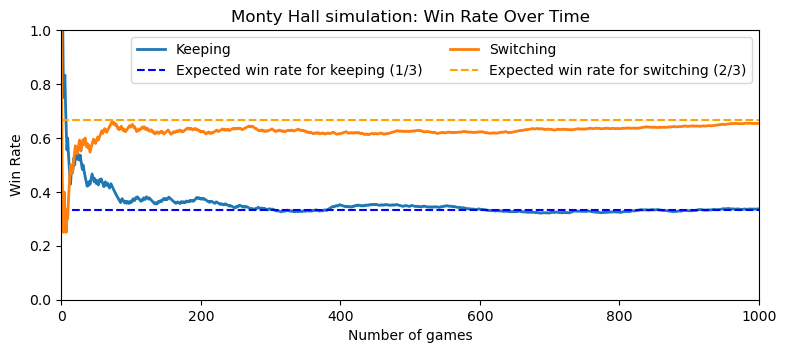

In [10]:
import matplotlib.pyplot as plt
import numpy as np


n_games = 1000

switch_trials = np.array([play_monty(switch=True) for _ in range(n_games)])
keep_trials = np.array([play_monty(switch=False) for _ in range(n_games)])

# Compute cumulative averages
switch_results = np.cumsum(switch_trials) / np.arange(1, n_games + 1)
keep_results = np.cumsum(keep_trials) / np.arange(1, n_games + 1)

# Plotting
plt.figure(figsize=(9, 3.5))

plt.plot(keep_results, label="Keeping", linewidth=2)
plt.axhline(1/3, color='blue', linestyle='--', label='Expected win rate for keeping (1/3)')

plt.plot(switch_results, label="Switching", linewidth=2)
plt.axhline(2/3, color='orange', linestyle='--', label='Expected win rate for switching (2/3)')

plt.xlabel("Number of games")
plt.ylabel("Win Rate")
plt.title("Monty Hall simulation: Win Rate Over Time")
plt.xlim(0,n_games)
plt.ylim(0,1)
plt.legend(ncol=2)

plt.show()

## 🎬 Wrapping Up

This is a classic example of how **probability is often not intuitive**. Our instincts can mislead us, even in situations that seem perfectly symmetrical.

Through a few lines of Python (and maybe a few digital goats), we have recreated the Monty Hall problem, played it interactively, and watched how the odds unfold over repeated trials. Whether you choose to simulate, play the game, or just think it through, one thing becomes clear:

> **Switching gives you a better shot.**

On a personal note: I first heard about this problem in *21*, a movie about card counting in casinos that I definitely do **not recommend**.

Fortunately, I encountered it again later, this time in the fantastic book [*The Drunkard’s Walk*](https://en.wikipedia.org/wiki/The_Drunkard%27s_Walk) by Leonard Mlodinow  as a college freshman. I credit that book for my interest in  **probability**.

Finally, this puzzle has a history beyond classrooms and code. When [Marilyn vos Savant](https://en.wikipedia.org/wiki/Marilyn_vos_Savant) published the correct solution in her column in *Parade* magazine in 1990, she received an avalanche of letters telling her she was wrong (She wasn't). It is a fascinating episode in the sociology of math, and [you can read more about it here](https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/).


